In [1]:
!pip list

Package                               Version
------------------------------------- -------------------
absl-py                               1.4.0
absolufy-imports                      0.3.1
accelerate                            1.10.1
aiofiles                              24.1.0
aiohappyeyeballs                      2.6.1
aiohttp                               3.12.15
aiosignal                             1.4.0
alabaster                             1.0.0
albucore                              0.0.24
albumentations                        2.0.8
ale-py                                0.11.2
altair                                5.5.0
annotated-types                       0.7.0
antlr4-python3-runtime                4.9.3
anyio                                 4.10.0
anywidget                             0.9.18
argon2-cffi                           25.1.0
argon2-cffi-bindings                  25.1.0
array_record                          0.8.1
arviz                                 0.22.0
astro

#import lib


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn import svm
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras import callbacks

In [5]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score

In [6]:
data_df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [9]:
data_df.isna().any().sum()

np.int64(0)

In [10]:
cols = ["#00EE00", "#EE0000"]

/tmp/ipython-input-4070704069.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data_df["DEATH_EVENT"], palette=cols)


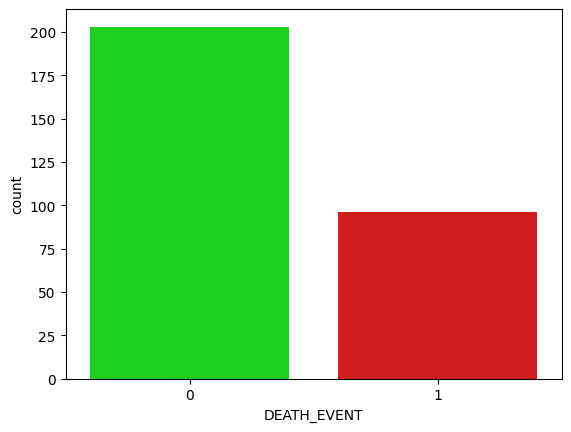

In [14]:
ax = sns.countplot(x=data_df["DEATH_EVENT"], palette=cols)

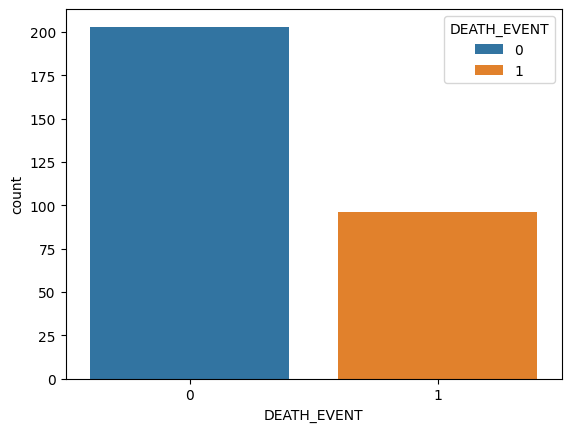

In [16]:
ax = sns.countplot(x="DEATH_EVENT", hue="DEATH_EVENT", data=data_df)

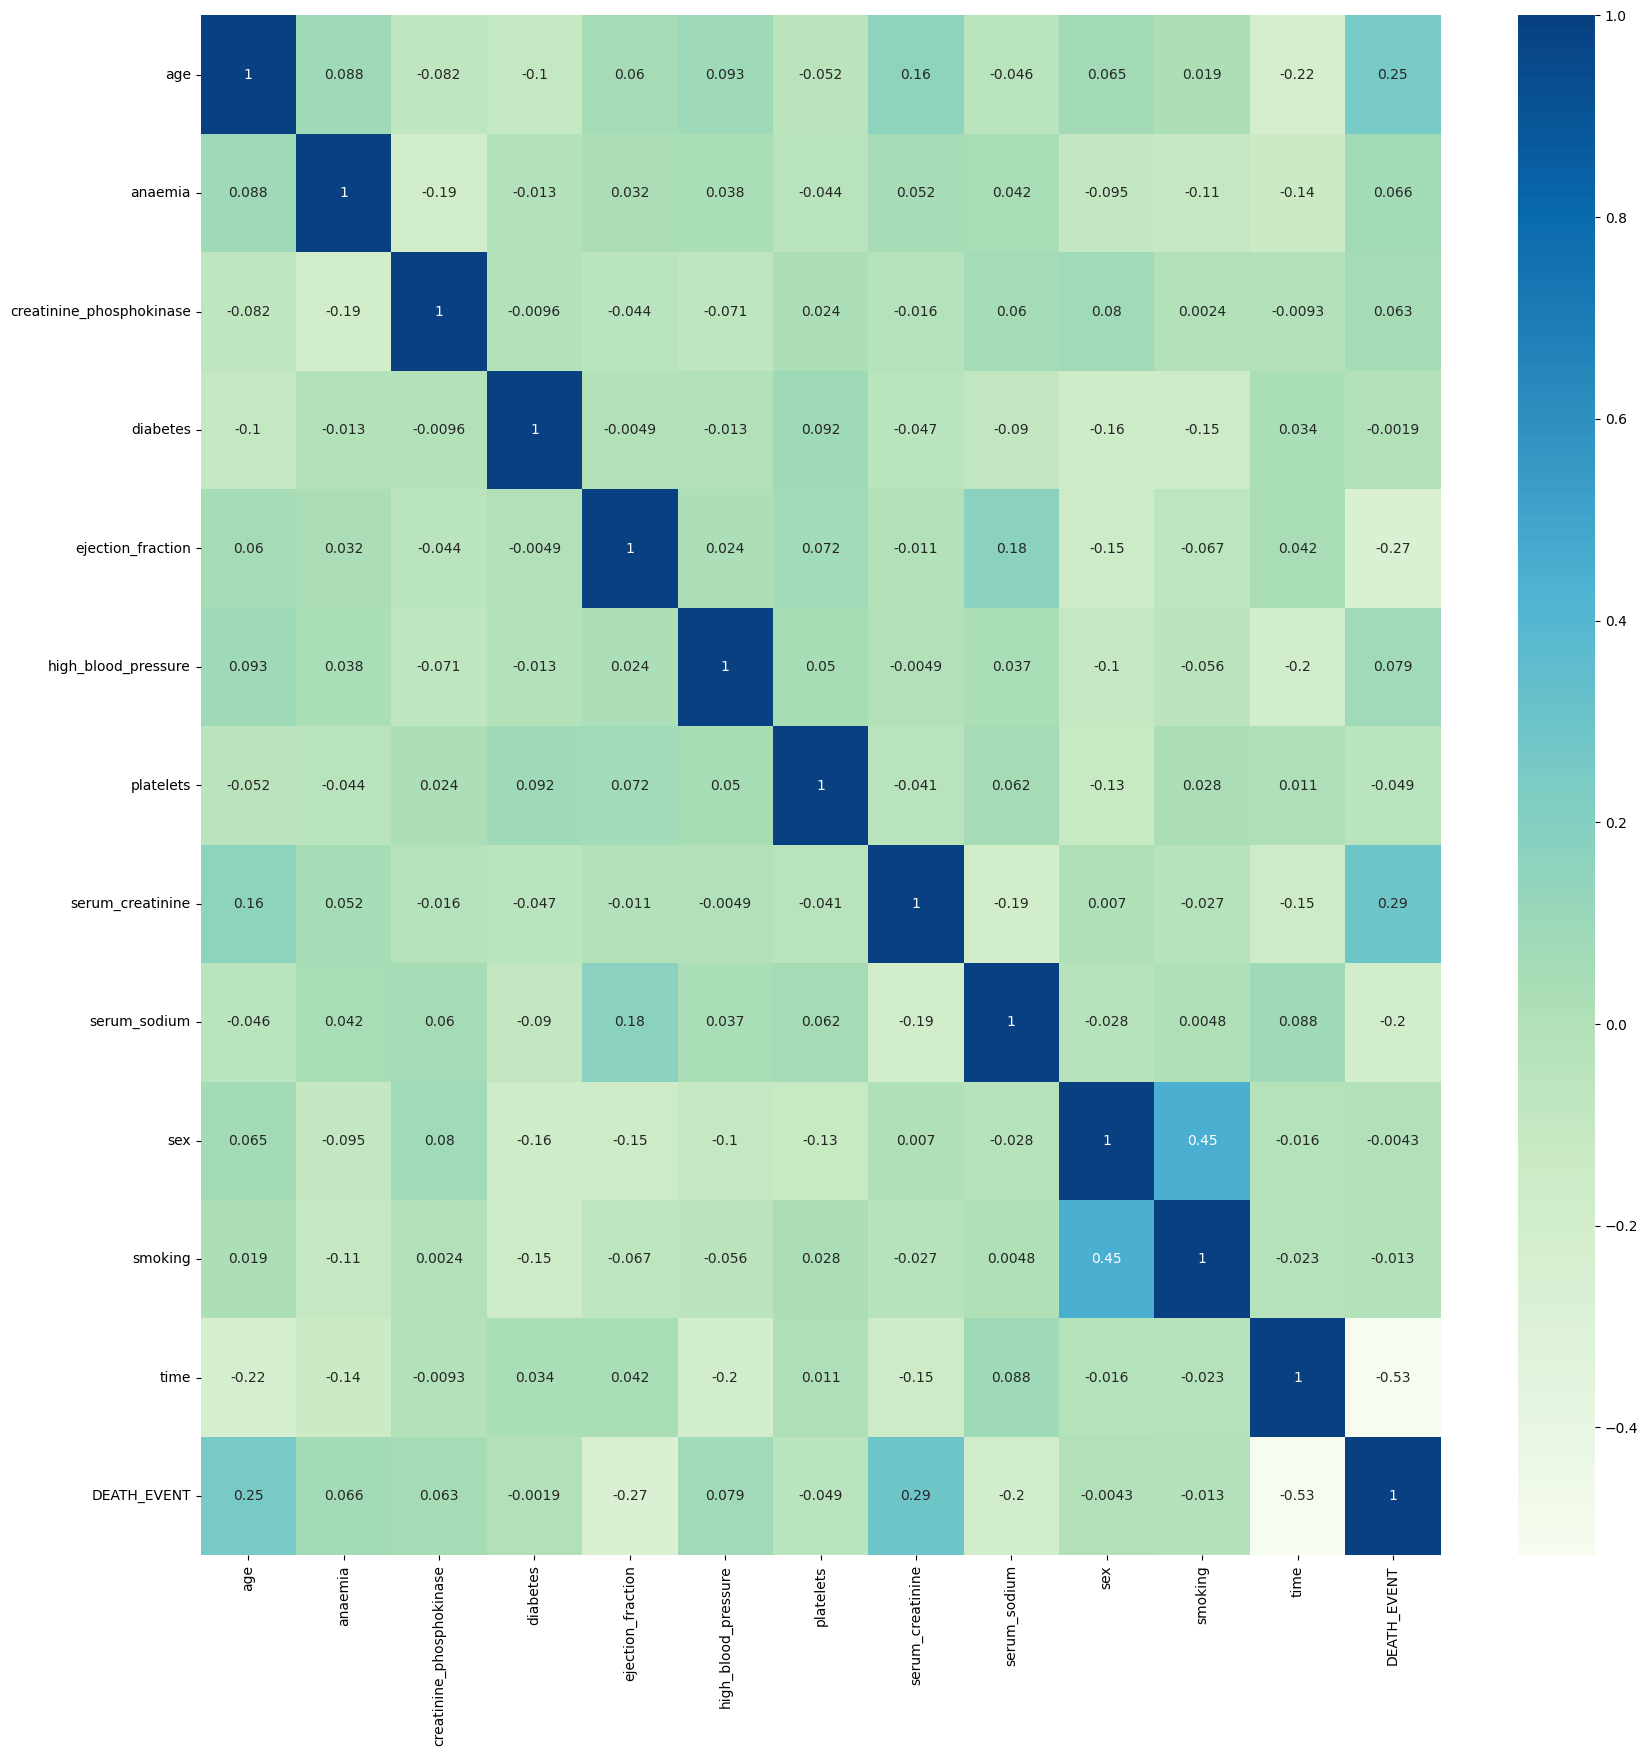

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(data_df.corr(), cmap="GnBu", annot=True)
plt.show()

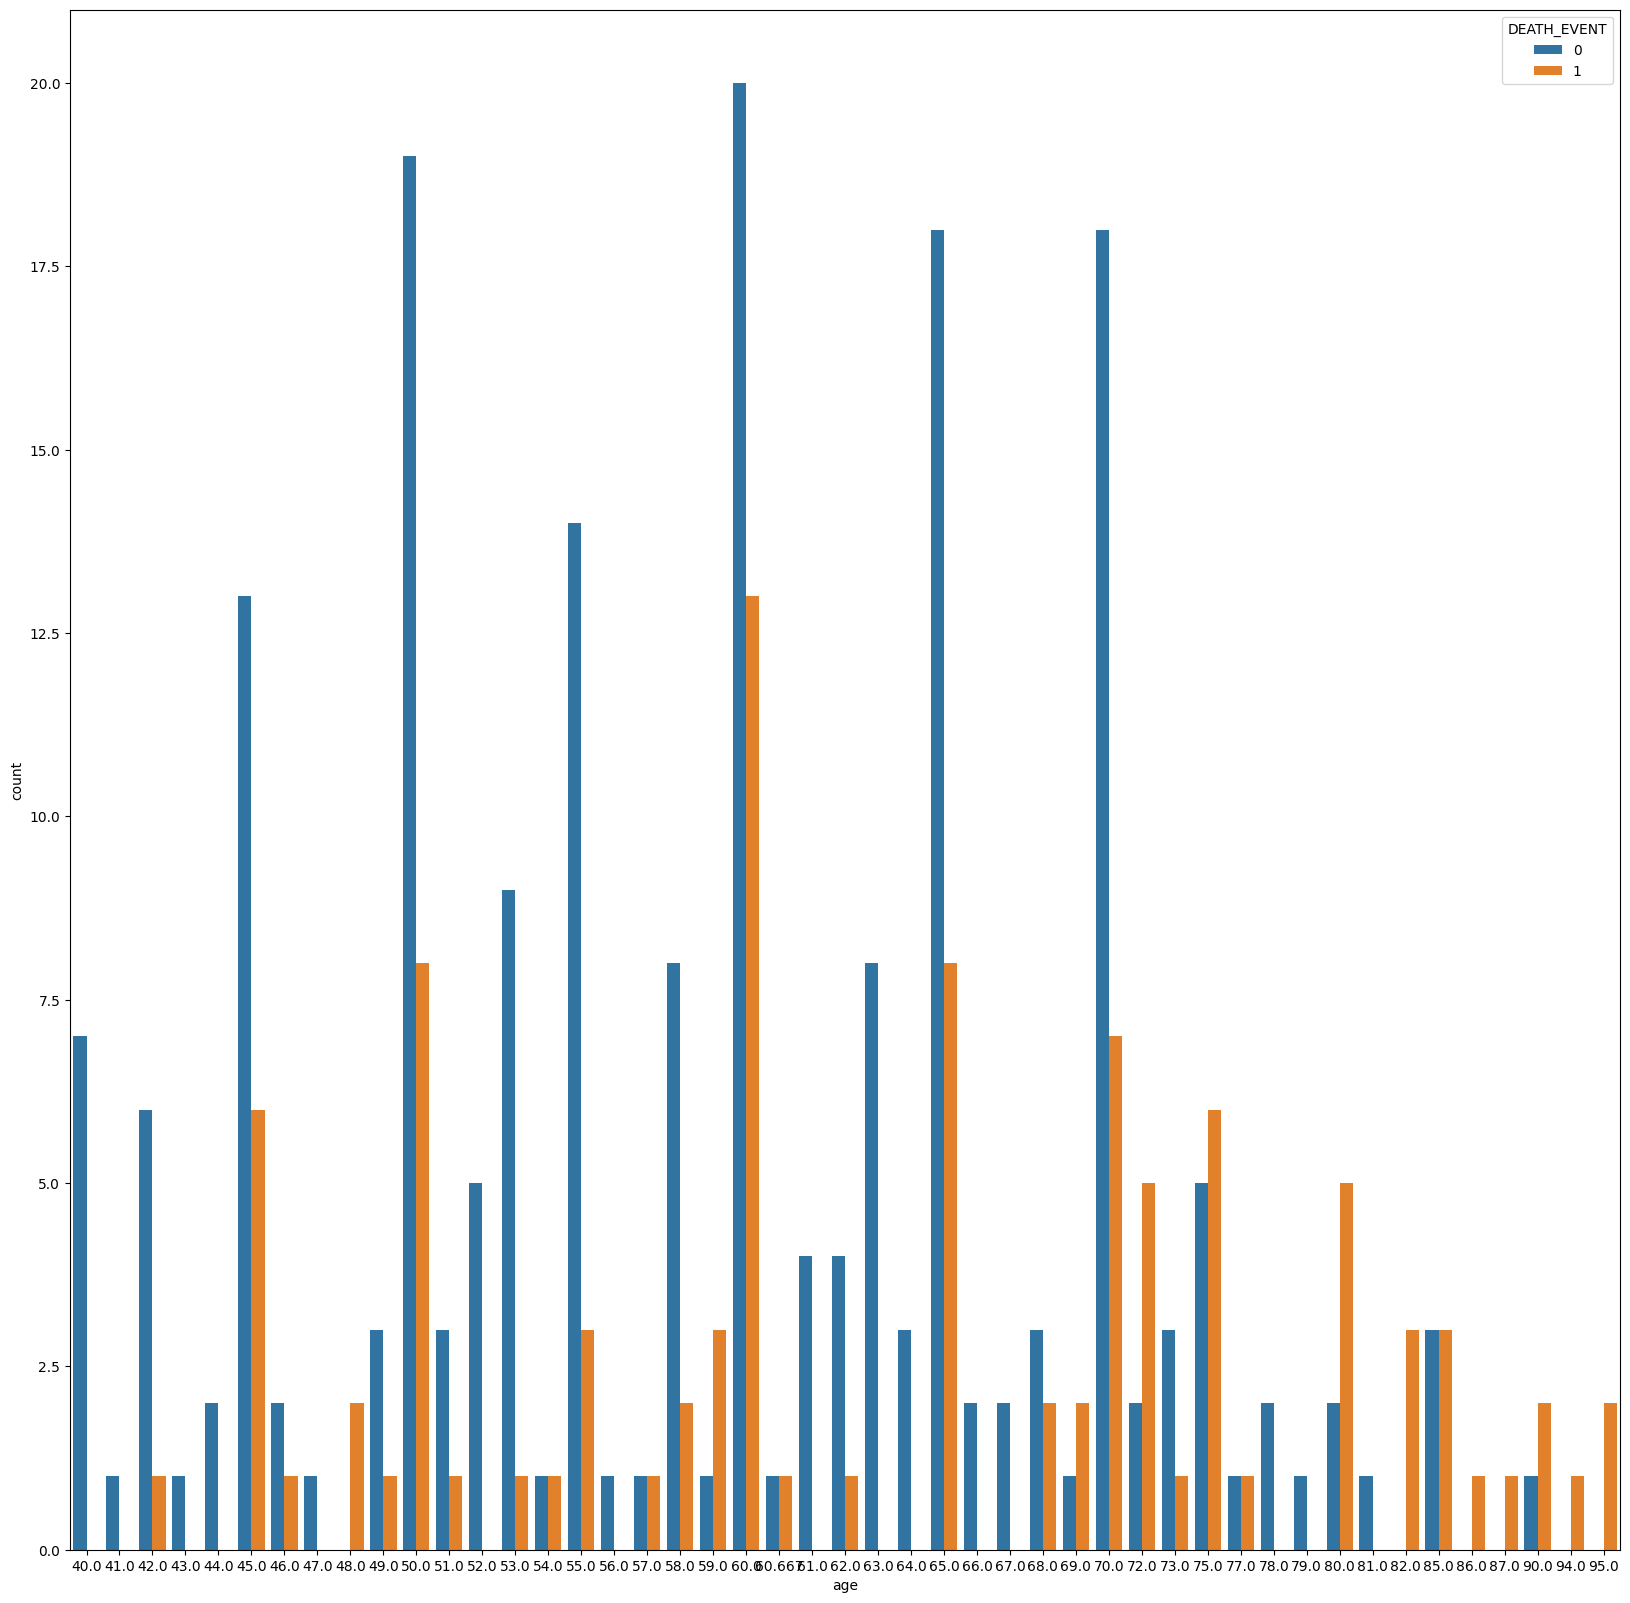

In [20]:
plt.figure(figsize=(20,20))
sns.countplot(x=data_df["age"], data=data_df, hue="DEATH_EVENT")
plt.show()

/tmp/ipython-input-1933202466.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_df["DEATH_EVENT"], y=data_df[i], palette=cols)


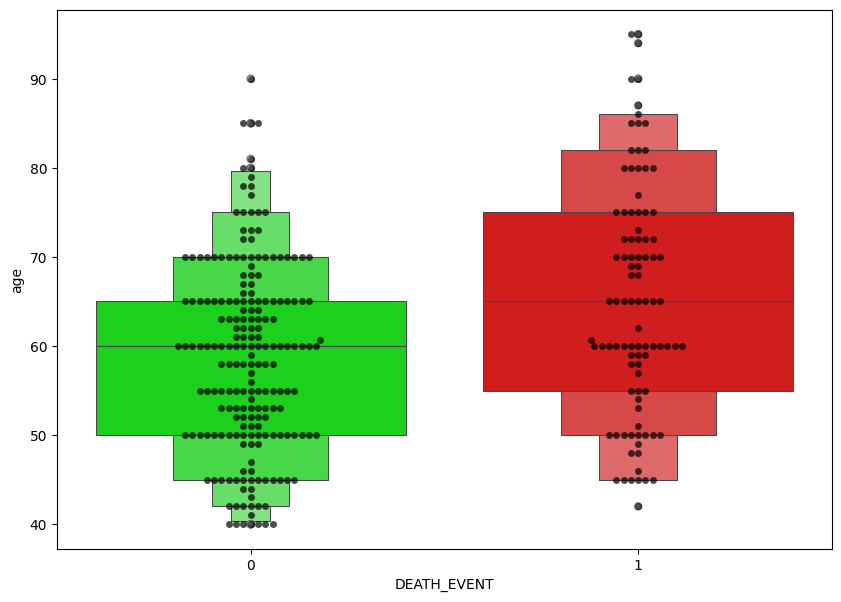

/tmp/ipython-input-1933202466.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_df["DEATH_EVENT"], y=data_df[i], palette=cols)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 13.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


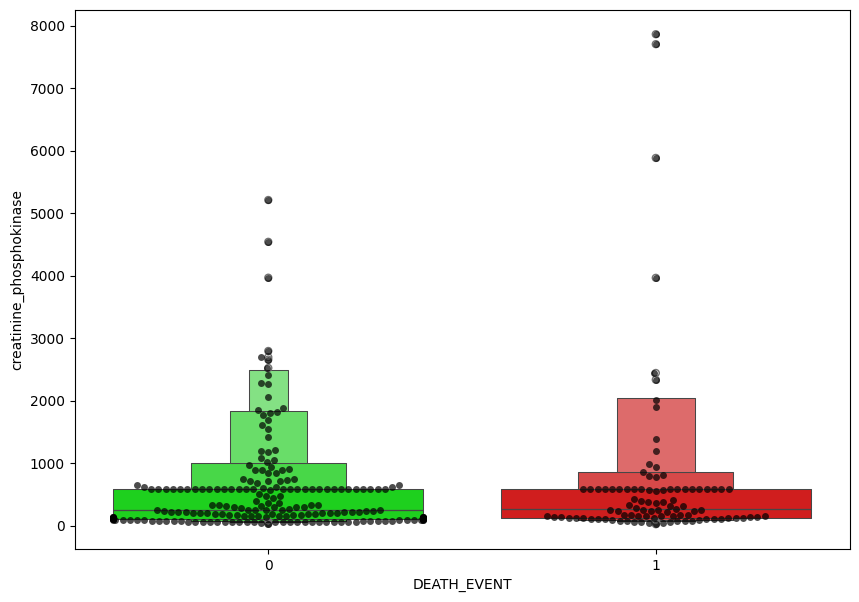

/tmp/ipython-input-1933202466.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_df["DEATH_EVENT"], y=data_df[i], palette=cols)


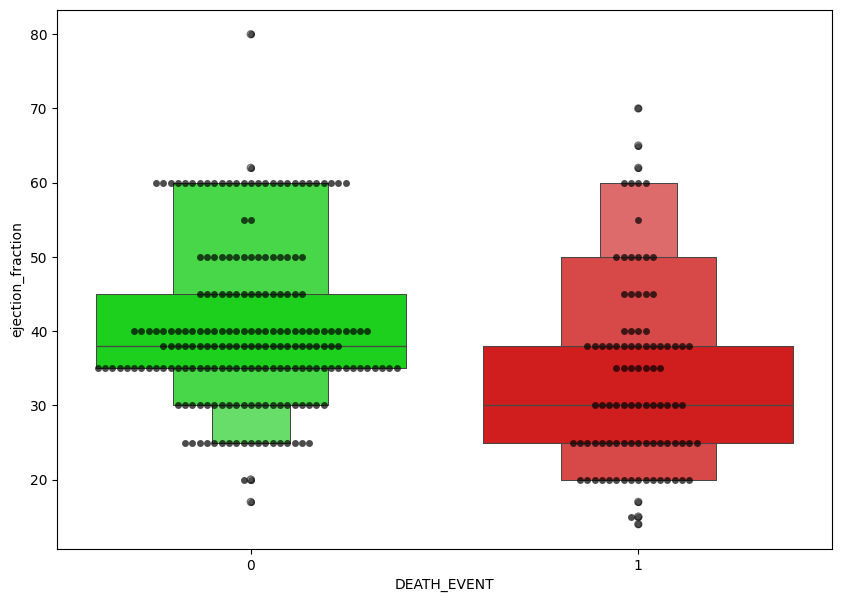

/tmp/ipython-input-1933202466.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_df["DEATH_EVENT"], y=data_df[i], palette=cols)


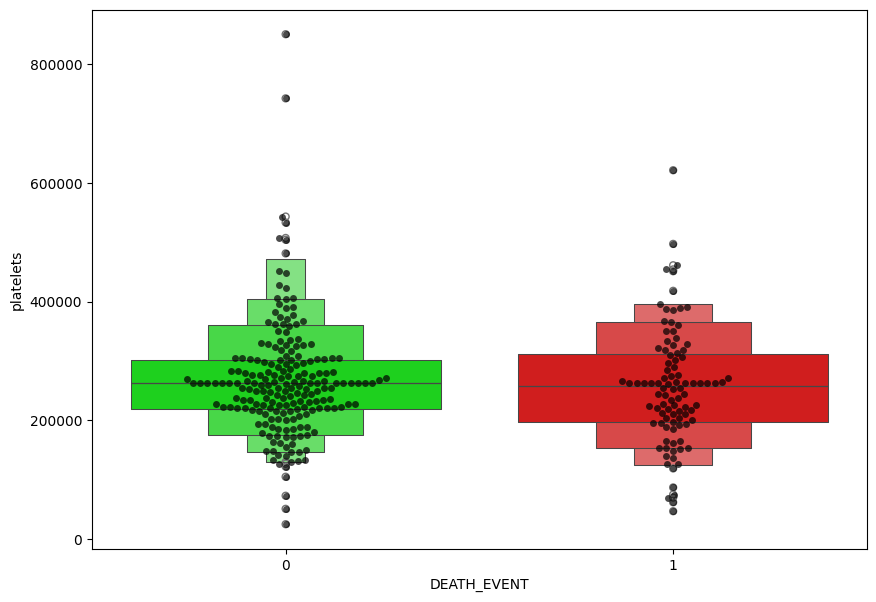

/tmp/ipython-input-1933202466.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_df["DEATH_EVENT"], y=data_df[i], palette=cols)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 10.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


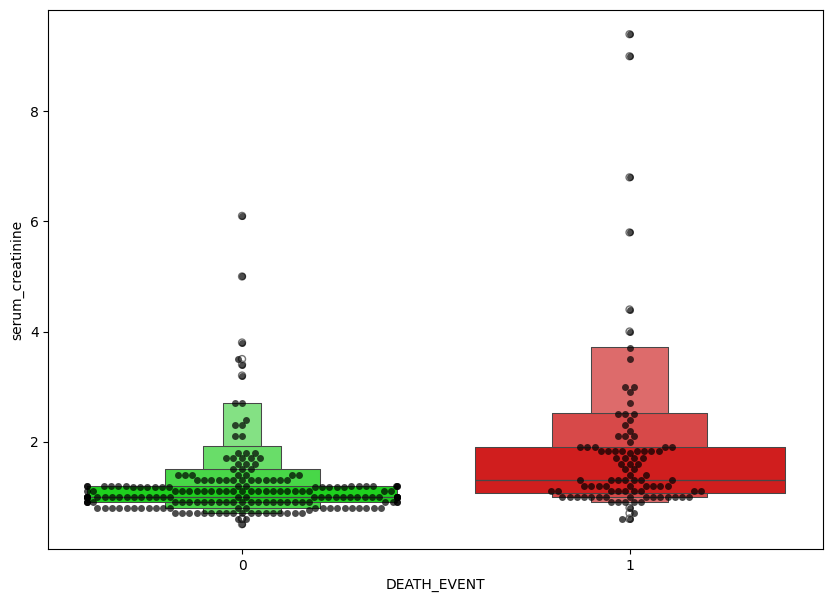

/tmp/ipython-input-1933202466.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_df["DEATH_EVENT"], y=data_df[i], palette=cols)


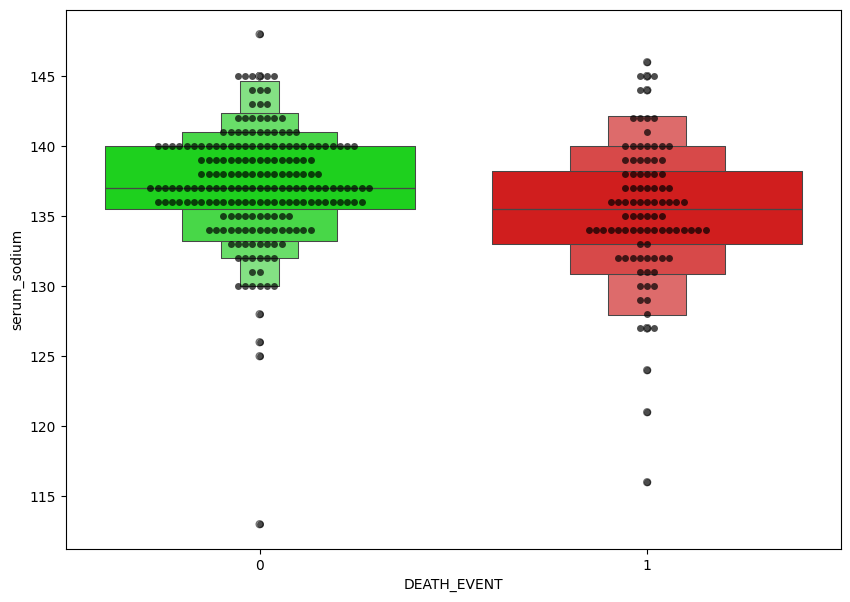

/tmp/ipython-input-1933202466.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data_df["DEATH_EVENT"], y=data_df[i], palette=cols)


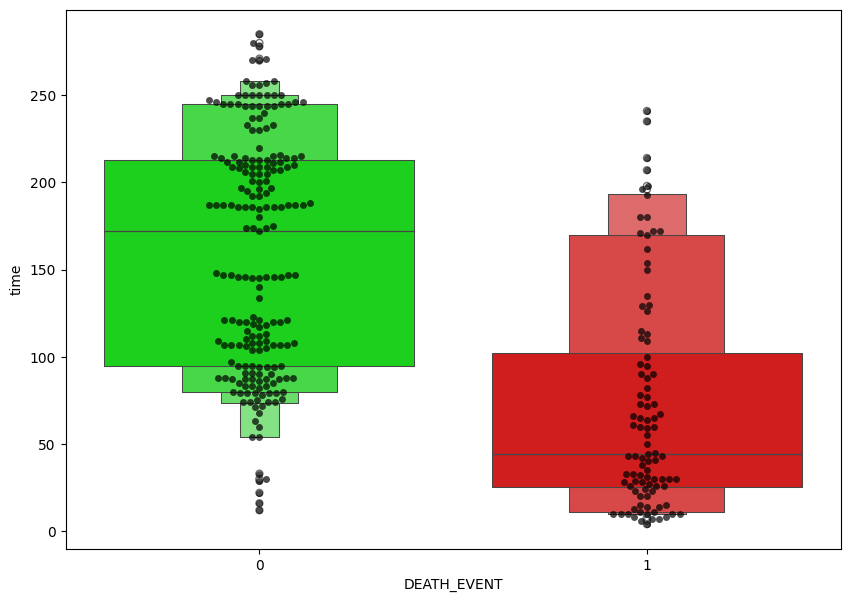

In [24]:
features = ["age","creatinine_phosphokinase", "ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]
for i in features:
  plt.figure(figsize=(10,7))
  sns.swarmplot(x=data_df["DEATH_EVENT"], y=data_df[i], color="black", alpha = 0.7)
  sns.boxenplot(x=data_df["DEATH_EVENT"], y=data_df[i], palette=cols)
  plt.show()

In [21]:
data_df.isna()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,False,False,False,False,False,False,False,False,False,False,False,False,False
295,False,False,False,False,False,False,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,False,False,False


#data preprocessing


In [38]:
X = data_df.drop(["DEATH_EVENT"], axis=1)
y = data_df["DEATH_EVENT"]

In [39]:
col_names = list(X.columns)
ss = StandardScaler()
X_scaled=ss.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled, columns=col_names)

In [40]:
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,5.703353e-16,1.001676,-1.754448,-0.828124,-0.070223,0.771889,2.877170
anaemia,299.0,1.009969e-16,1.001676,-0.871105,-0.871105,-0.871105,1.147968,1.147968
creatinine_phosphokinase,299.0,0.000000e+00,1.001676,-0.576918,-0.480393,-0.342574,0.000166,7.514640
diabetes,299.0,9.060014e-17,1.001676,-0.847579,-0.847579,-0.847579,1.179830,1.179830
ejection_fraction,299.0,-3.267546e-17,1.001676,-2.038387,-0.684180,-0.007077,0.585389,3.547716
high_blood_pressure,299.0,0.000000e+00,1.001676,-0.735688,-0.735688,-0.735688,1.359272,1.359272
platelets,299.0,7.723291e-17,1.001676,-2.440155,-0.520870,-0.013908,0.411120,6.008180
serum_creatinine,299.0,1.425838e-16,1.001676,-0.865509,-0.478205,-0.284552,0.005926,7.752020
serum_sodium,299.0,-8.673849e-16,1.001676,-5.363206,-0.595996,0.085034,0.766064,2.582144
sex,299.0,-8.911489e-18,1.001676,-1.359272,-1.359272,0.735688,0.735688,0.735688


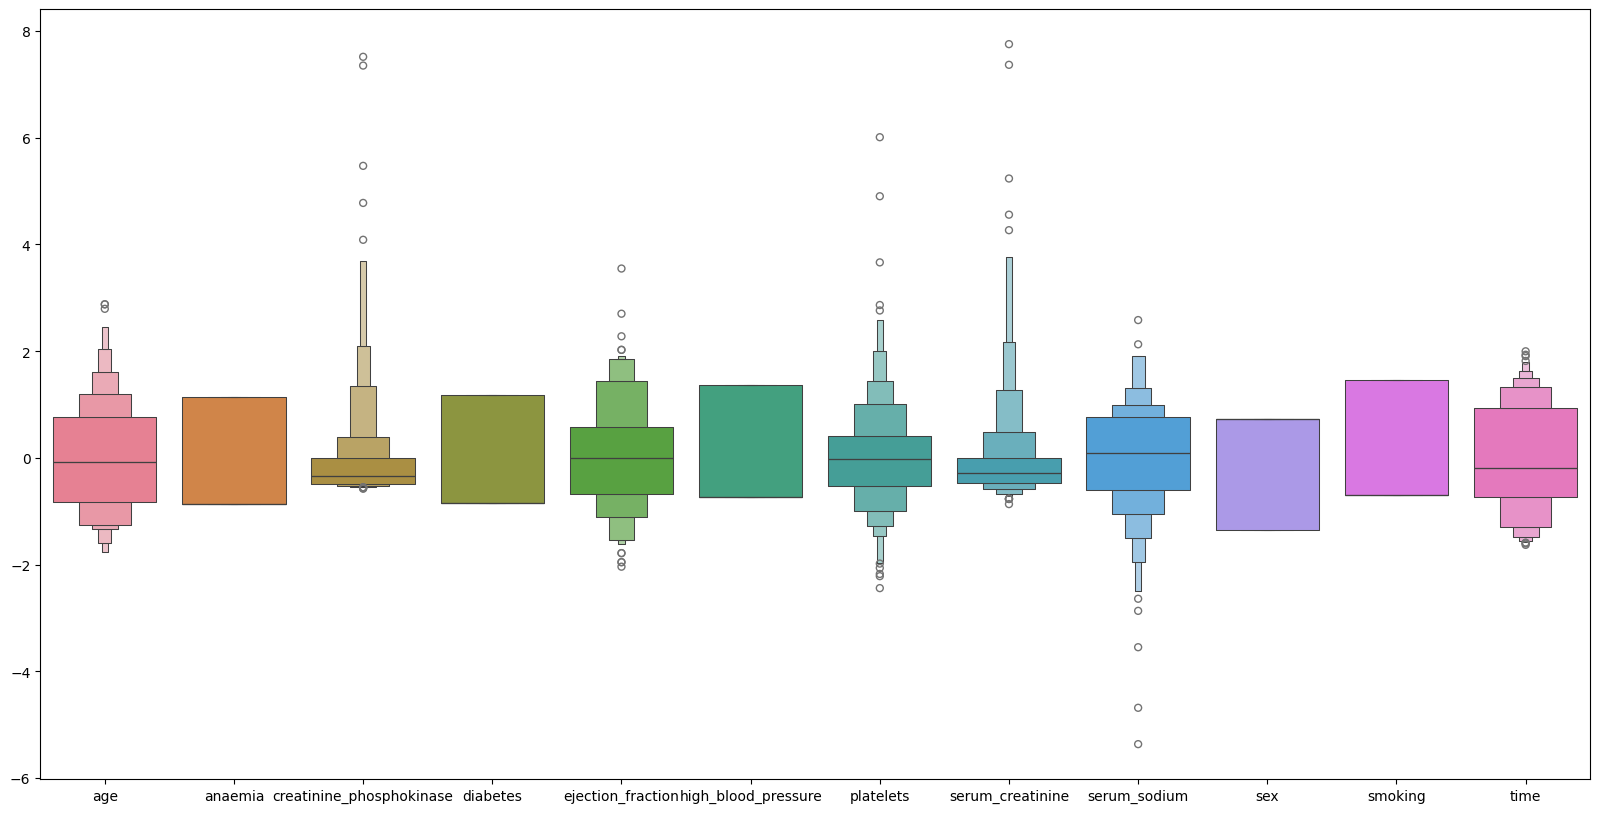

In [42]:
plt.figure(figsize=(20,10))
sns.boxenplot(data=X_scaled)
plt.show()

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

#model buildin

In [44]:
model1 = svm.SVC()

In [45]:
model1.fit(X_train, y_train)

SVC()

In [47]:
y_pred = model1.predict(X_test)

In [48]:
y_pred

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1])

In [49]:
np.array(y_test)

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0])

<Axes: >

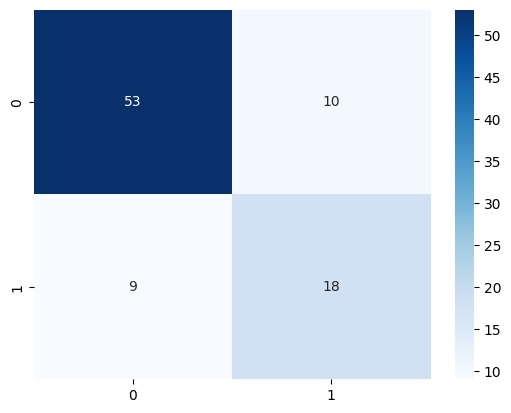

In [51]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap= "Blues")

In [52]:
accuracy_score(y_test, y_pred)

0.7888888888888889

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85        63
           1       0.64      0.67      0.65        27

    accuracy                           0.79        90
   macro avg       0.75      0.75      0.75        90
weighted avg       0.79      0.79      0.79        90



#ANN

In [81]:
early_stopping = callbacks.EarlyStopping(min_delta=0.0001,patience=10, restore_best_weights=True)
model = Sequential()
model.add(Dense(units = 32, activation = 'relu', input_dim = 12))
model.add(Dropout(0.25))
model.add(Dense(units = 8, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, activation = 'sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [82]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [83]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 32)             │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 689 (2.69 KB)

 Trainable params: 689 (2.69 KB)

 Non-trainable params: 0 (0.00 B)

In [84]:
history = model.fit(X_train, y_train, batch_size=20, epochs=100, validation_split=0.25, callbacks=[early_stopping])

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.6028 - loss: 0.6868 - val_accuracy: 0.6981 - val_loss: 0.6520
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6299 - loss: 0.7408 - val_accuracy: 0.7170 - val_loss: 0.6445
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5878 - loss: 0.7272 - val_accuracy: 0.7170 - val_loss: 0.6383
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6219 - loss: 0.6405 - val_accuracy: 0.7170 - val_loss: 0.6324
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4770 - loss: 0.7250 - val_accuracy: 0.7170 - val_loss: 0.6253
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6396 - loss: 0.6416 - val_accuracy: 0.7170 - val_loss: 0.6175
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6315 - loss: 0.6099 - val_accuracy: 0.7170 - val_loss: 0.6095
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6321 - loss: 0.7052 - val_accuracy: 0.7170 - val_loss:

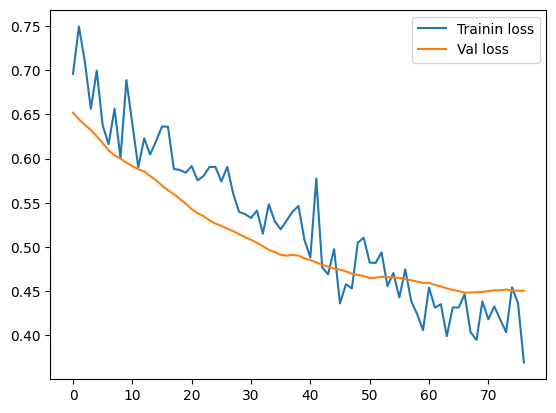

In [85]:
history_df = pd.DataFrame(history.history)
plt.plot(history_df.loc[:,['loss']], label = 'Trainin loss')
plt.plot(history_df.loc[:,['val_loss']], label = 'Val loss')
plt.legend()
plt.show()

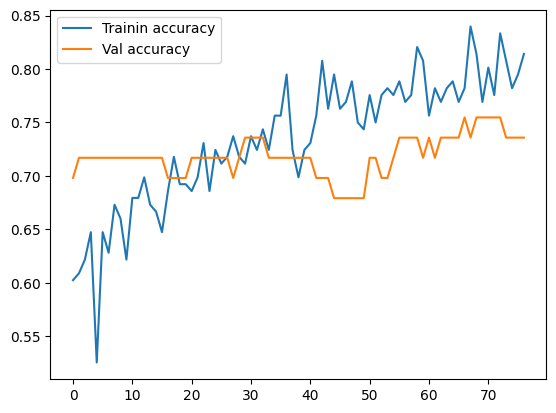

In [86]:
plt.plot(history_df.loc[:,['accuracy']], label = 'Trainin accuracy')
plt.plot(history_df.loc[:,['val_accuracy']], label = 'Val accuracy')
plt.legend()
plt.show()

In [88]:
y_pred = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [89]:
y_pred = (y_pred >0.5)

<Axes: >

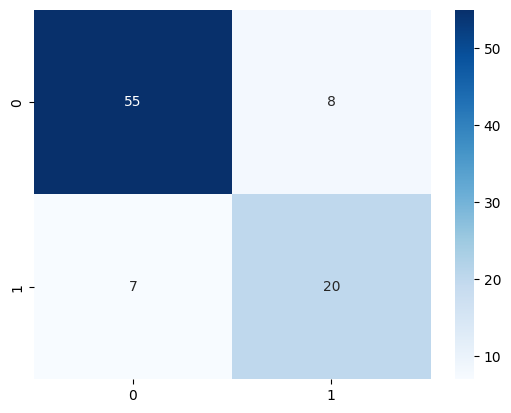

In [92]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap= "Blues")

In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        63
           1       0.71      0.74      0.73        27

    accuracy                           0.83        90
   macro avg       0.80      0.81      0.80        90
weighted avg       0.84      0.83      0.83        90

